In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
import numpy as np
import os
import gzip

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
tf.__version__

'2.0.0'

In [6]:
# 定义加载数据的函数，data_folder为保存gz数据的文件夹，该文件夹下有4个文件
# 'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
# 't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'

def load_data(data_folder):

  files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
  ]

  paths = []
  for fname in files:
    paths.append(os.path.join(data_folder,fname))

  with gzip.open(paths[0], 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[1], 'rb') as imgpath:
    x_train = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

  with gzip.open(paths[2], 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[3], 'rb') as imgpath:
    x_test = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

  return (x_train, y_train), (x_test, y_test)

(x_train_all, y_train_all), (x_test, y_test) = load_data('F:\\2、Deep Learning\Tensorflow\Keras_datasets\Fashion-MNIST')
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

def show_single_image(image_arr):
    plt.imshow(image_arr, cmap='binary')
    plt.show()

def show_images(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap='binary', interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# show_single_image(x_train[0])

# show_images(3, 5, x_train, y_train, class_names)

print(np.max(x_train), np.min(x_train))

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)
255 0


In [9]:
# 对数据做归一化  
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train:[None, 28, 28] ->[None, 784] (函数需求)->[None, 28, 28]  归一化要用到除法转为float
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [4]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid()
    plt.ylim(0, 1)
    plt.show()


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 113us/sample - loss: 2.2474 - accuracy: 0.7419 - val_loss: 0.6400 - val_accuracy: 0.7796
Epoch 2/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.5410 - accuracy: 0.8127 - val_loss: 0.5176 - val_accuracy: 0.8328
Epoch 3/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.4749 - accuracy: 0.8307 - val_loss: 0.4594 - val_accuracy: 0.8438
Epoch 4/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4484 - accuracy: 0.8408 - val_loss: 0.4045 - val_accuracy: 0.8584
Epoch 5/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4173 - accuracy: 0.8511 - val_loss: 0.4857 - val_accuracy: 0.8368
Epoch 6/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4003 - accuracy: 0.8580 - val_loss: 0.4079 - val_accuracy: 0.8556
Epoch 7/10
55000/55000 [==============================] 

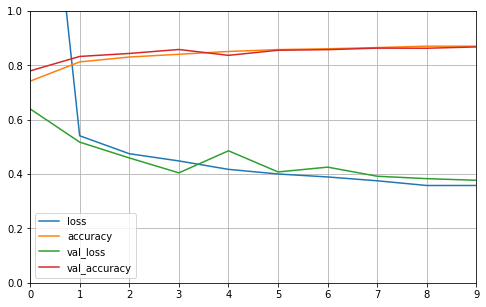

In [5]:
# 简化写法

model1 =keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))
plot_learning_curve(history1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 103us/sample - loss: 0.4571 - accuracy: 0.8337 - val_loss: 0.4143 - val_accuracy: 0.8440
Epoch 2/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.3536 - accuracy: 0.8689 - val_loss: 0.3319 - val_accuracy: 0.8772
Epoch 3/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3160 - accuracy: 0.8828 - val_loss: 0.3249 - val_accuracy: 0.8842
Epoch 4/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.2917 - accuracy: 0.8917 - val_loss: 0.3299 - val_accuracy: 0.8780
Epoch 5/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.2737 - accuracy: 0.8977 - val_loss: 0.3161 - val_accuracy: 0.8888
Epoch 6/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.2579 - accuracy: 0.9031 - val_loss: 0.3191 - val_accuracy: 0.8870
Epoch 7/10
55000/55000 [==============================] 

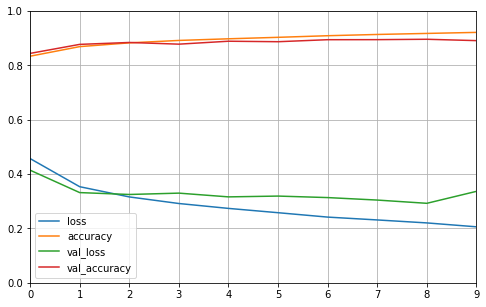

In [16]:
model2 =keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

history2 = model2.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))
plot_learning_curve(history2)

In [ ]:
model2.evaluate(x_test_scaled, y_test)